# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [1]:
# подключение библиотеки
import pandas as pd
import seaborn as sns # библиотека для визуализации статистических данных
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import numpy as np

In [2]:
# откройте данные: ваш код здесь

# подгрузка данных
spam_data = pd.read_csv('../../data/spam_or_not_spam.csv')
# смотрим на данные
spam_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [3]:
# рассчитайте частоты для классов : ваш код здесь

print('В датасете {} спам-сообщений'.format(spam_data[spam_data['label'] == 1]['label'].count()))
print('В датасете {} не спам-сообщений'.format(spam_data[spam_data['label'] == 0]['label'].count()))

В датасете 500 спам-сообщений
В датасете 2500 не спам-сообщений


Text(0.5, 0, 'Категории')

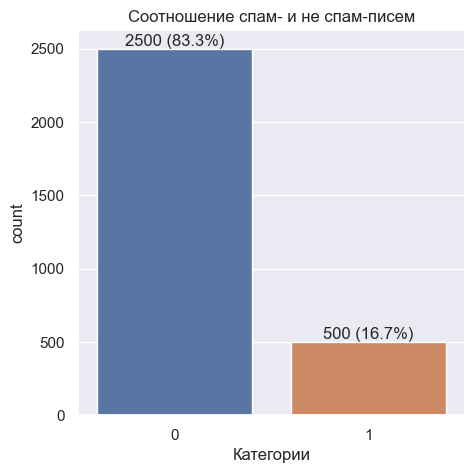

In [4]:
# визуализируйте результат: ваш код здесь

sns.set(rc={'figure.figsize':(5, 5)})
ax = sns.countplot(data=spam_data, x='label', order=spam_data['label'].value_counts(ascending=False).index);
        
abs_values = spam_data['label'].value_counts(ascending=False)
rel_values = spam_data['label'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title('Соотношение спам- и не спам-писем')
ax.set_xlabel('Категории')

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [6]:
#ваш код здесь

spam_data["email"] = spam_data["email"].str.replace('"|(\s@\s\w*[-]?\w+)', ' ', regex=True)
spam_data["email"] = spam_data["email"].str.replace(r"\W+", " ", regex=True).str.lower()
spam_data["email"] = spam_data["email"].str.replace('\s+', ' ', regex=True).str.strip()

spam_data = spam_data[spam_data["email"] != '']
spam_data=spam_data.dropna()

Переводим данные в векторный вид:

In [7]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(spam_data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [8]:
#ваш код здесь

print('{} : признаков получилось после предобработки данных'.format(X.shape[1]))

34116 : признаков получилось после предобработки данных


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [9]:
#ваш код здесь

y=spam_data['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [10]:
#ваш код здесь

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [11]:
#ваш код здесь

print('{:.3f} среднее значение целевой переменной для тестовой выборки'.format(y_test.mean()))

0.165 среднее значение целевой переменной для тестовой выборки


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [12]:
#ваш код здесь

clf = naive_bayes.ComplementNB(alpha = 0.01)
clf.fit(X_train, y_train)
display(clf)

y_test_pred = clf.predict(X_test)

ComplementNB(alpha=0.01)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [13]:
#ваш код здесь

print("Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_test_pred)))
print("Precision: {:.3f}".format(metrics.precision_score(y_test, y_test_pred)))
print("Recall: {:.3f}".format(metrics.recall_score(y_test, y_test_pred)))
print("F1: {:.3f}".format(metrics.f1_score(y_test, y_test_pred)))

Accuracy: 0.988
Precision: 1.000
Recall: 0.927
F1: 0.962


Нарисуйте ROC-кривую:

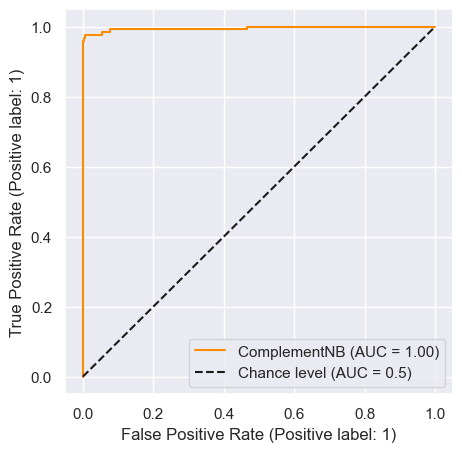

In [14]:
#ваш код здесь

svc_disp = metrics.RocCurveDisplay.from_estimator(clf, X_test, y_test,
                                                  color="darkorange",
                                                plot_chance_level=True)

# svc_disp = metrics.RocCurveDisplay.from_predictions(y_test, y_test_pred,
#                                                     color="darkorange",
#                                                     plot_chance_level=True)

# fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
# roc_auc = metrics.auc(fpr, tpr)
# display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
#                                   estimator_name='example estimator')
# display.plot()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [15]:
#ваш код здесь

param_grid_2 = {'alpha': list(np.linspace(0.1, 1, 100, dtype=float))
                # [0.01, 0.1, 0.3, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.9, 1]
              }
            
grid_search_dt = GridSearchCV(
    estimator=naive_bayes.ComplementNB(), 
    param_grid=param_grid_2, # словарь параметров для подбора
    cv=5, # валидация на 5 выборок
    n_jobs = -1 # все ядра процессора
) 
 
%time grid_search_dt.fit(X_train, y_train) 
y_test_pred = grid_search_dt.predict(X_test) 

print("Наилучшие значения гиперпараметров: {} \n".format(grid_search_dt.best_params_)) 
print("Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_test_pred)))
print("Precision: {:.3f}".format(metrics.precision_score(y_test, y_test_pred)))
print("Recall: {:.3f}".format(metrics.recall_score(y_test, y_test_pred)))
print("F1: {:.3f}".format(metrics.f1_score(y_test, y_test_pred)))

CPU times: total: 998 ms
Wall time: 6.81 s
Наилучшие значения гиперпараметров: {'alpha': 0.33636363636363636} 

Accuracy: 0.995
Precision: 0.992
Recall: 0.976
F1: 0.984


<Axes: ylabel='param_alpha'>

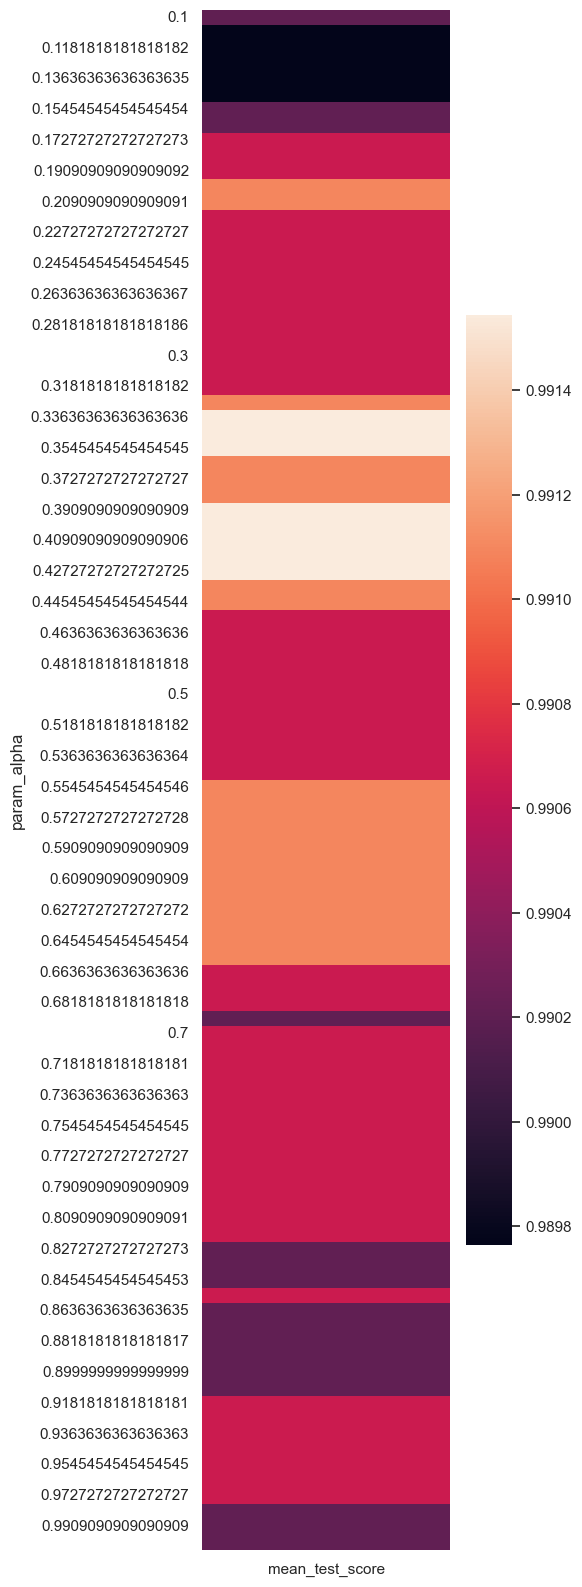

In [16]:
visual = pd.pivot_table(pd.DataFrame(grid_search_dt.cv_results_),
        values='mean_test_score', index='param_alpha')

sns.set(rc={'figure.figsize':(4, 20)})
sns.heatmap(visual)
